# Introduction

Welcome to this data exploration of a rather large handful of music reviews done by Pitchfork. Here we'll see how the relationship between the scores of records and if they were labeled best new music or not, how review length correlates with the score, and how authors tend to review the records they listen to! Let's get right to it.

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('reviews.csv')

data.head()

,reviewid,Unnamed: 0,title,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,reviewid.1,content,genre,label,artist
0,22703,0,mezzanine,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017,22703,"“Trip-hop” eventually became a ’90s punchline,...",electronic,virgin,massive attack
1,22721,1,prelapsarian,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017,22721,"Eight years, five albums, and two EPs in, the ...",metal,hathenter,krallice
2,22659,2,all of them naturals,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017,22659,Minneapolis’ Uranium Club seem to revel in bei...,rock,static shock,uranium club
3,22661,4,first songs,http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017,22661,Kleenex began with a crash. It transpired one ...,rock,kill rock stars,"kleenex, liliput"
4,22725,8,new start,http://pitchfork.com/reviews/albums/22725-new-...,8.1,0,kevin lozano,tracks coordinator,2017-01-06,4,6,1,2017,22725,It is impossible to consider a given release b...,electronic,teklife,taso


In [2]:
len(data.iloc[0, 14]) #testing to see the length of a review

9310

In [2]:
data.dtypes

reviewid            int64
Unnamed: 0          int64
title              object
url                object
score             float64
best_new_music      int64
author             object
author_type        object
pub_date           object
pub_weekday         int64
pub_day             int64
pub_month           int64
pub_year            int64
reviewid.1          int64
content            object
genre              object
label              object
artist             object
dtype: object

In [4]:
data.columns

Index(['reviewid', 'Unnamed: 0', 'title', 'url', 'score', 'best_new_music',
       'author', 'author_type', 'pub_date', 'pub_weekday', 'pub_day',
       'pub_month', 'pub_year', 'reviewid.1', 'content', 'genre', 'label',
       'artist'],
      dtype='object')

In [211]:
#Percentage of columns with null values.
data.isnull().sum()/data.shape[0]

reviewid          0.000000
Unnamed: 0        0.000000
title             0.000109
url               0.000000
score             0.000000
best_new_music    0.000000
author            0.000000
author_type       0.212312
pub_date          0.000000
pub_weekday       0.000000
pub_day           0.000000
pub_month         0.000000
pub_year          0.000000
reviewid.1        0.000000
content           0.000544
genre             0.128562
label             0.002556
artist            0.000109
dtype: float64

Not many null values in any of the columns. No need to drop anything in case we would want to predict on something.

## Average Album Scores

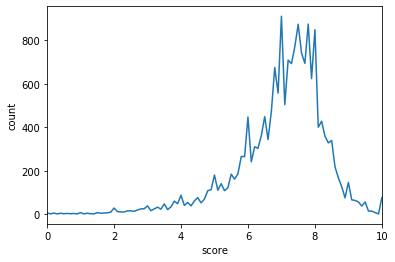

In [7]:
records = data['score'].value_counts().sort_index().plot.line()
records.set_ylabel('count')
_ = records.set_xlabel('score')

This is very interesting. As a daily user of pitchfork for the past seven years or so, I'm quite surprised with how many albums fall under the 8.0 ranking. However, I'm easily not surprised that 6.0 has the most albums that fall under it because of how often I see records with that score just from going on their website for the past couple of years.
Let's take a closer look at the higher ranked albums, from 8.0 and above.

## Records Ranked 8.0 and Above

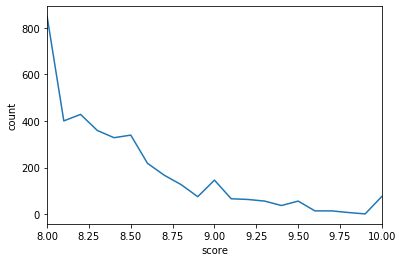

In [12]:
records = data[data['score'] >= 8.0]['score'].value_counts().sort_index().plot.line()
records.set_ylabel('count')
_ = records.set_xlabel('score')

There's a big dip in how many albums score above an 8.0. Looking at this graph, the visualization makes sense. When you compare movies/shows and music, it would be reasonable that a perfect 10/10 appears very rarely. How often are movies given 10/10? Not so often, just check RottenTomatoes for starters on movie reviews. The same mentality would go for music.
It looks like great music, but flawed (like 8.0) appears the most here, with a count of around 800.

## Best New Music and Review Scores

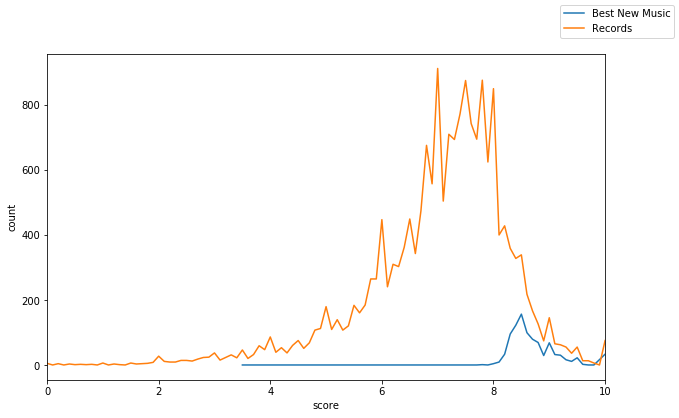

In [15]:
fig = plt.figure(figsize=(10,6))
bnm = data[data['best_new_music']>0]['score'].value_counts().sort_index().plot.line()
records = data['score'].value_counts().sort_index().plot.line()
bnm.set_ylabel('count')
bnm.set_xlabel('score')
_ = fig.legend(labels=['Best New Music','Records'])

It looks as if albums scored with an 8.5 have the most best new music releases. The amount of best new music seems to dwindle down a little bit as you get to higher ranked records, but it jumps back up when you start to look at records scored with a perfect 10/10. The jump back up is pretty reasonable, considerding if a record is perfect, then any song released from that record as a promotional single would be a no brainer in being called best new music.

Out of curiosity, lets look at all the records that scored a 10.0 that DON'T have songs that were released before Pitchfork came up with the Best New Music label.

### Albums with a Score of 10 Before Pitchfork's BNM Category

In [223]:
idx = (data.best_new_music == 0) & (data.score == 10.0) 
bnm_before = data.loc[idx, ['artist', 'title', 'pub_date']]
bnm_before

,artist,title,pub_date
200,bob dylan,blood on the tracks,2016-10-30
355,brian eno,another green world,2016-09-18
451,stevie wonder,songs in the key of life,2016-08-21
530,nina simone,in concert,2016-07-30
654,neil young,tonight's the night,2016-06-26
706,kate bush,hounds of love,2016-06-12
857,prince,"sign ""o"" the times",2016-04-30
858,prince,1999,2016-04-30
861,"prince, the revolution",purple rain,2016-04-29
862,prince,dirty mind,2016-04-29


This data makes sense because most of these records either came out before 2003 (That's when Pitchfork released the  'Best New Music' label), or is a re-released version of a particular record, so it woulnd't really be "new" music. Take for example deluxe editions of certain records, like DJ Shadow's Endtroducing or R.E.M.'s Murmur.

### Albums with a Score of 10 After Pitchfork's BNM Category

In [214]:
idx = (data.best_new_music == 1) & (data.score == 10.0) & (data.pub_date > '2003-1-1')
bnm = data.loc[idx, ['artist', 'title', 'pub_date']]
bnm.head()

,artist,title,pub_date
191,public image ltd,metal box,2016-11-01
1092,michael jackson,off the wall,2016-02-24
1332,john coltrane,a love supreme: the complete masters,2015-11-25
1372,a tribe called quest,people's instinctive travels and the paths of ...,2015-11-13
1399,van morrison,astral weeks,2015-11-06


We can see here that a lot of these albums are actually old albums just reissued as a special edition, anniversary, etc. Let's remove these from this data frame.

In [204]:
searchfor = ['edition', 'reissue', 'deluxe', 'anniversary']
bnm_new = bnm[~bnm.title.str.contains('|'.join(searchfor))]
bnm_new.head()

,artist,title,pub_date
191,public image ltd,metal box,2016-11-01
1092,michael jackson,off the wall,2016-02-24
1332,john coltrane,a love supreme: the complete masters,2015-11-25
1372,a tribe called quest,people's instinctive travels and the paths of ...,2015-11-13
1399,van morrison,astral weeks,2015-11-06


There are some excpetions here. Looking at the Pitchfork website, I saw that records that were labeled "Best New Reissue" were categorized as "Best New Music" in our data frame.

In [224]:
print("Perfect Records before the BNM Category:", len(bnm_before))
print("Perfect Records after the BNM Category:", len(bnm_new))


Perfect Records before the BNM Category: 42
Perfect Records after the BNM Category: 25


## Top Genres of Music

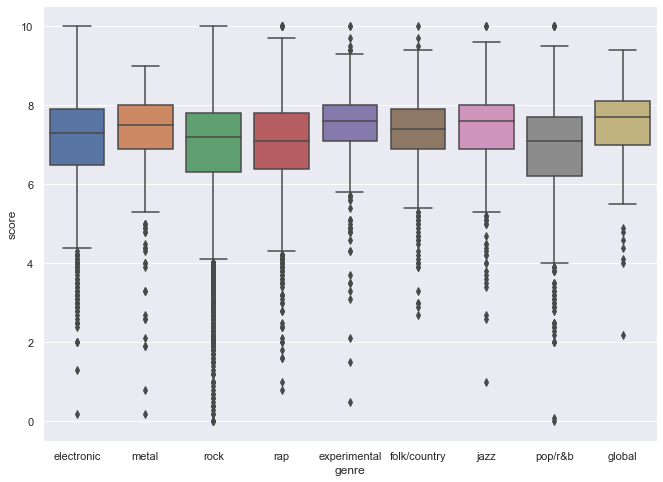

In [14]:
sns.set(rc={'figure.figsize':(11,8)})

_=sns.boxplot(y="score", x="genre", data=data)

In [11]:
data['genre'].value_counts()

rock            9435
electronic      1994
rap             1488
pop/r&b         1087
folk/country     574
experimental     565
metal            357
jazz             341
global           183
Name: genre, dtype: int64

More numerically, as we see above, rock clearly outnumbers all other genres in terms of how many reviews there are. Electronic music at number 2, and has around 7000 less reviews than rock music! So I think it's safe to say Pitchfork is predominantly a rock music review website.

Let's look further into how the scores for these genres have varied over the years.

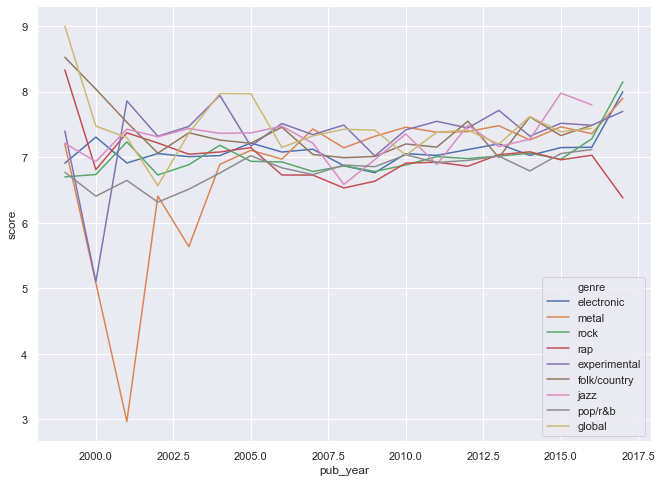

In [34]:
_=sns.lineplot(x="pub_year", y="score", hue = 'genre', err_style = None, data=data)

It looks like experimental and metal music suffered greatly during 2000-2002. The rest of the grenres tend to average out at a score of 6 to to 8. But as of recent years, starting from 2016, most of these genres (with the exception of rap and jazz) have been on an upward trend of scoring better results.

Now, looking at the actual written reviews, what can we say about the length of a review and the final score for an album? Is there a trend here? Let's take a look.

## Does Review Length Correlate with Review Score?

#### New Column: Review Length

In [4]:
data['review_length'] = data['content'].str.len()
data['review_length'].fillna((data['review_length'].mean()), inplace=True)
data.head()

,reviewid,Unnamed: 0,title,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,reviewid.1,content,genre,label,artist,review_length
0,22703,0,mezzanine,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017,22703,"“Trip-hop” eventually became a ’90s punchline,...",electronic,virgin,massive attack,9310.0
1,22721,1,prelapsarian,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017,22721,"Eight years, five albums, and two EPs in, the ...",metal,hathenter,krallice,2797.0
2,22659,2,all of them naturals,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017,22659,Minneapolis’ Uranium Club seem to revel in bei...,rock,static shock,uranium club,3565.0
3,22661,4,first songs,http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017,22661,Kleenex began with a crash. It transpired one ...,rock,kill rock stars,"kleenex, liliput",7717.0
4,22725,8,new start,http://pitchfork.com/reviews/albums/22725-new-...,8.1,0,kevin lozano,tracks coordinator,2017-01-06,4,6,1,2017,22725,It is impossible to consider a given release b...,electronic,teklife,taso,3210.0


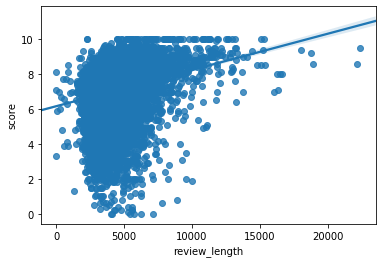

In [5]:
_=sns.regplot(x="review_length", y='score', data=data)

#### Calculating Covariance of the two above variables, Score and Review Length...

In [6]:
from scipy import stats
from numpy import mean

x = data['review_length']
y = data['score']

data_ = [x,y]

df = pd.DataFrame(data=data_)

np.cov(df)


array([[2.04138366e+06, 4.23729780e+02],
       [4.23729780e+02, 1.67390115e+00]])

In [12]:
from scipy.stats import pearsonr

corr, _ = pearsonr(x, y)
print("Pearson's Correlation:", corr)

Pearson's Correlation: 0.22922488683945236


Look at that! There's a positive correlation here. But it isn't the strongest correlation becuase its less than .5 and closer to 0, but there's still a relationship here. How can we interpret this correlation? Well when we think about it, it would make sense that someone would quickly dismiss a record by leaving a short review if the reviewer ultimately gave it a low score. Conversely, if a reviewer *really* loved an album and gave it a 9 or above, then it would make sense that the reviewer would want to say a lot about the album in terms of why they love it so much.

## Top Reviewers

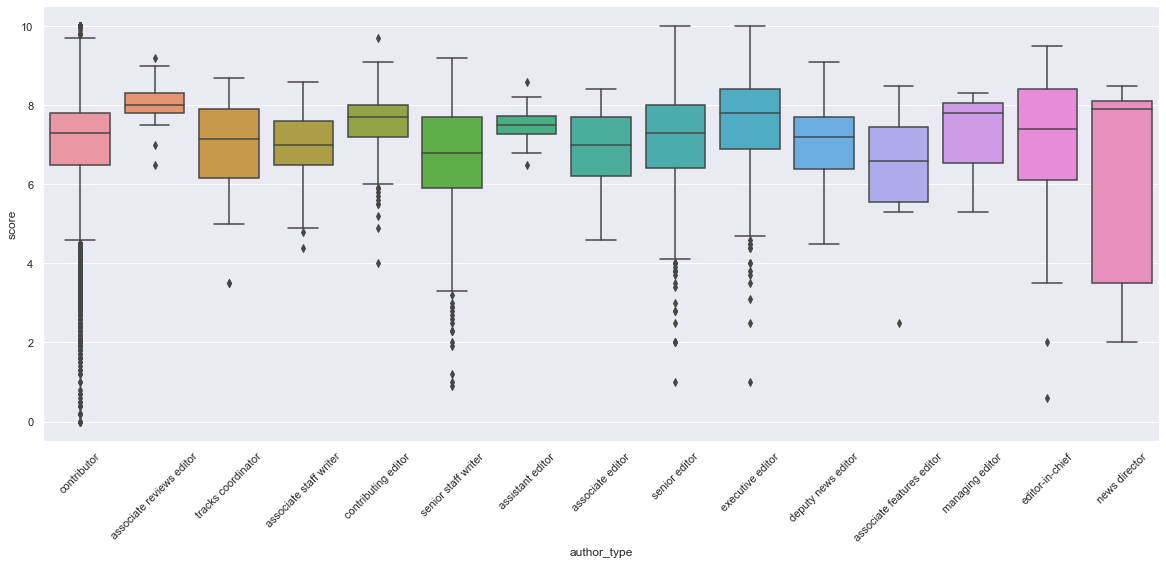

In [106]:
sns.set(rc={'figure.figsize':(20,8)})

vis = sns.boxplot(x='author_type', y='score', data=data)
_=vis.set_xticklabels(vis.get_xticklabels(), rotation=45)


It looks like if your album was reviewed by a Senior Staff Writer, then chances are your album is going to score pretty low. But looking at the Contributor, lots of outliers tend to score from 0 to 4 (and sometimes a 10) while the majority of the data lies in between 6.5 to 8. 

More specifically, let's look into the authors who have written the most reviews.

In [120]:
data['author'].value_counts().head(15).rename_axis('author').reset_index(name='counts')

,author,counts
0,joe tangari,815
1,stephen m. deusner,725
2,ian cohen,699
3,brian howe,500
4,mark richardson,476
5,stuart berman,445
6,marc hogan,439
7,nate patrin,347
8,marc masters,312
9,jayson greene,299


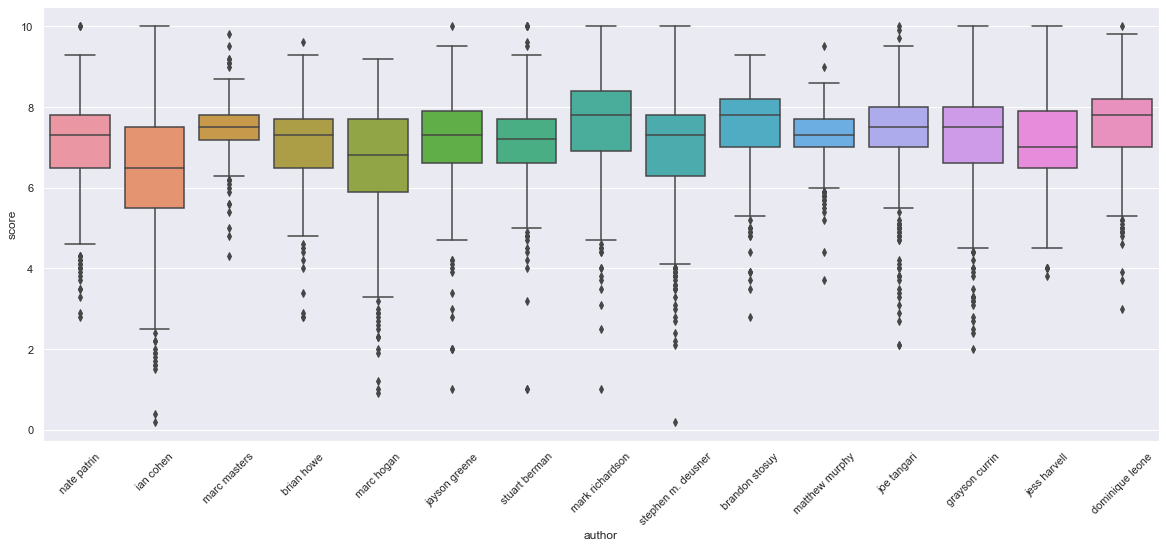

In [116]:
m = data.groupby('author')['score'].transform('size').gt(270)
#data.loc[m].boxplot(by='author', column='score')
#^using seaborn, can also be written as:
x_data = data.loc[m]
vis = sns.boxplot(x='author', y='score', data=x_data)
_=vis.set_xticklabels(vis.get_xticklabels(), rotation=45)

Looks like if you wanted your album to not get a low score, you'd better hope Ian Cohen won't review it. Conversely, Mark Richardson tends to give much higher scores to the albums he listens to.
Comparing this to the author_type boxplot above, do Ian and Mark fall into the expected author type categories?

In [131]:
data[data.author == 'ian cohen'].head(1)

,reviewid,Unnamed: 0,title,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,reviewid.1,content,genre,label,artist
9,22724,13,filthy america its beautiful,http://pitchfork.com/reviews/albums/22724-filt...,5.3,0,ian cohen,contributor,2017-01-04,2,4,1,2017,22724,There were innumerable cameos at the Bad Boy F...,rap,roc nation,the lox


In [132]:
data[data.author == 'mark richardson'].head(1)

,reviewid,Unnamed: 0,title,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,reviewid.1,content,genre,label,artist
87,22674,135,young death / nightmarket,http://pitchfork.com/reviews/albums/22674-youn...,6.9,0,mark richardson,executive editor,2016-12-01,3,1,12,2016,22674,In the years following the 2007 release of the...,experimental,hyperdub,burial


Here we can see that Ian is classified as a Contributor. Looking at the graph above, the outliers could be explained by Ian's tendency to give records lower scores than from the rest of the authors.
As for Mark, he's classified as an Executive Editor. His positive reviews definitely reflect those of the Executive Editor Scores. But looking more closely... is Mark the *only* Executive Editor? I would assume yes since the job of Executive Editors oversee all other editors in their branch. But we can double check just to be sure.

In [158]:
data[data.author_type == 'executive editor']

,reviewid,Unnamed: 0,title,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,reviewid.1,content,genre,label,artist
87,22674,135,young death / nightmarket,http://pitchfork.com/reviews/albums/22674-youn...,6.9,0,mark richardson,executive editor,2016-12-01,3,1,12,2016,22674,In the years following the 2007 release of the...,experimental,hyperdub,burial
310,22298,427,expert knob twiddlers,http://pitchfork.com/reviews/albums/22298-expe...,6.6,0,mark richardson,executive editor,2016-09-30,4,30,9,2016,22298,Richard D. James is like the Miles Davis of el...,electronic,planet mu,mike & rich
369,22283,510,e2-e4,http://pitchfork.com/reviews/albums/22283-e2-e4/,9.2,1,mark richardson,executive editor,2016-09-14,2,14,9,2016,22283,Some classic albums have origin stories that t...,NaN,mg.art,manuel gttsching
612,22065,848,wildflower,http://pitchfork.com/reviews/albums/22065-wild...,8.5,1,mark richardson,executive editor,2016-07-08,4,8,7,2016,22065,To listen to the Avalanches is to wrestle with...,electronic,xl,the avalanches
654,22053,908,tonight's the night,http://pitchfork.com/reviews/albums/22053-toni...,10.0,0,mark richardson,executive editor,2016-06-26,6,26,6,2016,22053,"In February 1972, Neil Young put out an album ...",rock,reprise,neil young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16731,2727,24651,gradations,http://pitchfork.com/reviews/albums/2727-grada...,7.9,0,mark richardson,executive editor,2002-08-21,2,21,8,2002,2727,It's becoming clear that the first Electric Bi...,electronic,mille plateaux,electric birds
16733,2983,24654,sun papa and the fan club orchestra vol. 1 and...,http://pitchfork.com/reviews/albums/2983-sun-p...,7.1,0,mark richardson,executive editor,2002-08-20,1,20,8,2002,2983,Say what you like about Belgium's Scratch Pet ...,electronic,sonig,fan club orchestra
17044,4801,25089,orion,http://pitchfork.com/reviews/albums/4801-orion/,6.1,0,mark richardson,executive editor,2002-04-28,6,28,4,2002,4801,Not to be confused with the guitarded punks on...,rock,morr,limp
17066,3585,25126,in moll,http://pitchfork.com/reviews/albums/3585-in-moll/,8.3,0,mark richardson,executive editor,2002-04-18,3,18,4,2002,3585,"True critical consensus is rare, but I've yet ...",electronic,kompakt,markus guentner


This definitely points us to the right direction that Mark is the only Executive Editor. But just to make sure...

In [160]:
data[data.author_type == 'executive editor'].nunique()

reviewid          475
Unnamed: 0        475
title             473
url               475
score              60
best_new_music      2
author              1
author_type         1
pub_date          465
pub_weekday         7
pub_day            31
pub_month          12
pub_year           16
reviewid.1        475
content           475
genre               8
label             200
artist            341
dtype: int64

And he is! We conclude so because author is equal to 1. AKA, Mark Richardson.

# Conclusion

Music, much like a lot of other forms of art, is subjective. Just by looking at the chart of author's and how they usually rate records, one can easily see that some author's are pickier than others and vice versa. More on subjectivity, a reviewer absolutely would love to go on and on about a record they gave a high score. Makes sense. Who wouldn't want to say all they can about something they absolutely love in order to influence someone to do the same.